# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Sholawati]
- **Email:** [sholawati802@gmail.com]
- **ID Dicoding:** [sholawatiiiii]

## Menentukan Pertanyaan Bisnis

- Kapan musim dengan jumlah penyewaan sepeda tertinggi?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [16]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [17]:
#Load dataset
df = pd.read_csv('submission/data/data_1.csv')

#Menampilkan 5 data teratas
print("5 Data teratas:")
df.head()

#Menampilkan jumlah baris dalam kolom
print("\nJumlah Baris dan kolom:")
print(df.shape)

#Menampilkan tipe data setiap kolom:
print("\nTipe data setiap kolom:")
print(df.dtypes)

#Mengecek missing values
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# Ubah kolom tanggal menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

#Ganti nama kolom agar lebih mudah dimengerti
df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_rentals',
    'atemp': 'feels_like',
    'weathersit': 'weather',
}, inplace=True)

#Ubah nilai numerik ke bentuk kategori yang lebih deskriptif
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
}

weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

#Mapping ke kolom terkait
df['season'] = df['season'].map(season_map)
df['weather'] = df['weather'].map(weather_map)

#Mapping nilai tahun agar lebih (0 = 2011, 1=2012)
df['yaer'] = df['year'].map({0: 2011, 1:2012})


5 Data teratas:

Jumlah Baris dan kolom:
(731, 16)

Tipe data setiap kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Jumlah missing value per kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Gathering Data

In [18]:
#Load dataset
df = pd.read_csv('submission/data/data_1.csv')

#Menampilkan 5 data teratas
print("5 Data teratas:")
df.head()

5 Data teratas:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari 731 baris dan 16 kolom.
- Tidak terdapat missing value di dalam dataset.
- Kolom dteday berisi data tanggal dari tahun 2011 sampai 2012.
- Data sudah cukup lengkap untuk dianalisis tanpa perlu imputasi nilai hilang.

### Assessing Data

In [19]:
#Menampilkan jumlah baris dalam kolom
print("\nJumlah Baris dan kolom:")
print(df.shape)

#Menampilkan tipe data setiap kolom:
print("\nTipe data setiap kolom:")
print(df.dtypes)

#Mengecek missing values
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah Baris dan kolom:
(731, 16)

Tipe data setiap kolom:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Jumlah missing value per kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dataset terdiri dari 731 baris dan 16 kolom.
- Tidak terdapat missing value di dalam dataset.
- Kolom season, yr, mnth, dan weekday bebentuk numerik yang perlu dikonversi ke kategori agar lebih informatif.
- Tidak ditemukan duplikasi data.

### Cleaning Data

In [20]:
# Ubah kolom tanggal menjadi tipe datetime
df['dteday'] = pd.to_datetime(df['dteday'])

#Ganti nama kolom agar lebih mudah dimengerti
df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_rentals',
    'atemp': 'feels_like',
    'weathersit': 'weather',
}, inplace=True)

#Ubah nilai numerik ke bentuk kategori yang lebih deskriptif
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter',
}

weather_map = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

#Mapping ke kolom terkait
df['season'] = df['season'].map(season_map)
df['weather'] = df['weather'].map(weather_map)

#Mapping nilai tahun agar lebih (0 = 2011, 1=2012)
df['yaer'] = df['year'].map({0: 2011, 1:2012})

**Insight:**
- Kolom yang tidak relevan seperti instant, dteday, casual, dan registered telah dihapus untuk menyederhanakan analisis.
- Kolom kategorikal seperti season, yr, mnth, holiday, weekday, workingday, dan weathersit telah dikonversi ke tipe kategori agar lebbih representatif.

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik deskriptif:
          instant                 date        year       month     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

          weekday  workingday        temp  feels_like    humidity   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    0.495385    0.474354    0.627894    0.190486   
min      0.000000    0.000000   

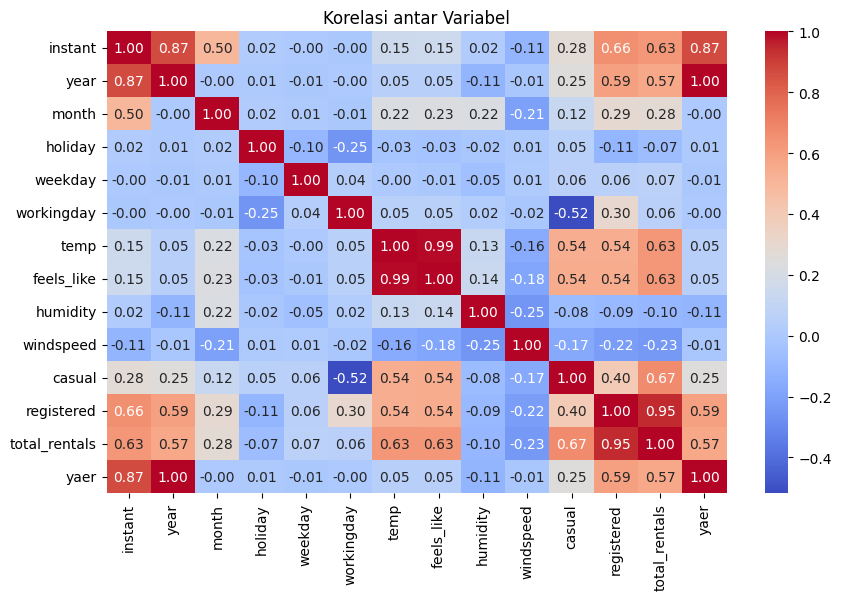


Jumlah penyewaan per musim:
season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: total_rentals, dtype: int64

Jumlah penyewaan per kondisi cuaca:
weather
Clear              2257952
Mist/Cloudy         996858
Light Rain/Snow      37869
Name: total_rentals, dtype: int64


In [21]:
# Statistik deskriptif
print("Statistik deskriptif:")
print(df.describe())

# Korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Variabel")
plt.show()

# Jumlah penyewaan per musim
season_agg = df.groupby('season')['total_rentals'].sum().sort_values(ascending=False)
print("\nJumlah penyewaan per musim:")
print(season_agg)

# Jumlah penyewaan per cuaca
weather_agg = df.groupby('weather')['total_rentals'].sum().sort_values(ascending=False)
print("\nJumlah penyewaan per kondisi cuaca:")
print(weather_agg)

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim gugr (Fall), menunjukkan bahwa musim ini adalah periode paling aktif untuk pengguna.
- Penggunaan sepeda menurun drastis saat kondisi cuaca buruk, terutama saat hujan/salju, dan paling tinggi saat cuaca cerah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan musim dengan jumlah penyewaan sepeda tertinggi?

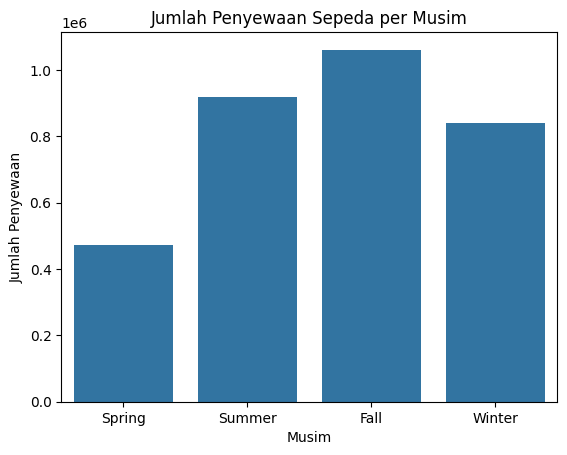

In [22]:
# 1. Visualisasi jumlah penyewaan per musim
sns.barplot(data=df, x='season', y='total_rentals', estimator=sum, errorbar=None)
plt.title("Jumlah Penyewaan Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

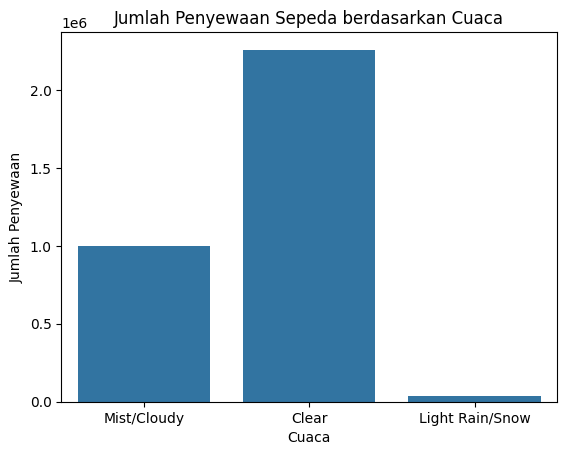

In [23]:
# 2. Visualisasi jumlah penyewaan per cuaca
sns.barplot(data=df, x='weather', y='total_rentals', estimator=sum, errorbar=None)
plt.title("Jumlah Penyewaan Sepeda berdasarkan Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Jumlah penyewaan sepeda tertinggi terjadi pada musim Fall(Gugur), menunjukkan musim ini sebagai waktu paling aktif bagi pengguna.
- Penyewaan sepeda jauh lebih tinggi saat cuaca cerah, dan menurun tajam saat hujan atau salju lebat, menunjukkan pengaruh signifikan dari kondisi cuaca.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pada musim gugur(Fall), rata-rata jumlah penyewaan sepeda mencapai puncaknya. Ini menunjukkan bahwa pengguna lebih aktif menggunakan sepeda di musim ini, kemungkinan karena cuaca yang nyaman dan kondisi jalan yang mendukung.
- Cuaca memiliki pengaruh besar terhadap penyewaan sepeda. Cuaca cerah mendorong jumlah penyewaan yang tinggi, sementara cuaca buruk seperti hujn atau salju menyebabkan penurunan tajam dalam aktivitas penyewaan.

### Menyimpan Hasil ke main_data.csv

In [26]:
# Menyimpan data yang telah dibersihkan ke dashboard/main_data.csv
df.to_csv('submission/dashboard/main_data.csv', index=False)
print("Data berhasil disimpan ke 'dashboard/main_data.csv'")

Data berhasil disimpan ke 'dashboard/main_data.csv'
